In [22]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords jika belum ada
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset dari lokasi yang telah ditentukan
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\twitter_data.csv"

# Pastikan format CSV benar, gunakan sep="," atau "\t"
try:
    df = pd.read_csv(file_path, sep=",", encoding="utf-8")
except:
    df = pd.read_csv(file_path, sep="\t", encoding="utf-8")

# Fungsi untuk membersihkan teks
def clean_tweet(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Hapus URL
    text = re.sub(r"\d+", "", text)  # Hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca
    text = re.sub(r"\s+", " ", text).strip()  # Hapus spasi berlebih
    words = word_tokenize(text)  # Tokenisasi kata
    words = [word for word in words if word not in stopwords.words('indonesian')]  # Hapus stopwords
    return " ".join(words)

# Pastikan nama kolom yang berisi teks adalah 'tweet', jika berbeda, ganti


[nltk_data] Downloading package stopwords to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Pastikan stopwords sudah diunduh
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\twitter_data.csv"
df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

# Fungsi membersihkan teks
def clean_tweet(text):
    text = text.lower()  # Konversi ke huruf kecil
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Hapus hashtag
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Hapus karakter khusus
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    
    words = word_tokenize(text)  # Tokenisasi
    stop_words = set(stopwords.words('indonesian'))  # Stopwords bahasa Indonesia
    filtered_words = [word for word in words if word not in stop_words]  # Hapus stopwords
    
    return ' '.join(filtered_words)

# Deteksi kolom teks otomatis
text_column = None
for col in df.columns:
    sample_text = str(df[col].dropna().values[0])
    if len(sample_text.split()) > 3:  # Asumsi teks lebih dari 3 kata
        text_column = col
        break

if text_column:
    df["clean_tweet"] = df[text_column].astype(str).apply(clean_tweet)
else:
    raise ValueError("Kolom teks tweet tidak ditemukan! Periksa nama kolom.")

# Hapus duplikasi
df = df.drop_duplicates(subset=["clean_tweet"])

# Simpan hasil ke file baru
df.to_csv("clean_twitter_data.csv", index=False, encoding='utf-8')

print("Pembersihan selesai! Data disimpan dalam 'clean_twitter_data.csv'")

[nltk_data] Downloading package stopwords to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/Fathu Rizka/Downloads/TestCase/dataset/twitter_data.csv", sep="\t")

# Lihat 5 baris pertama
df.head()



,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1340330565157801985,1340330565157801985,2020-12-19 23:18:03 WIB,2020-12-19,23:18:03,700,233033398,ozy_pwt,Ayahnya ARA,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1340330520383635457,1340329916248682497,2020-12-19 23:17:52 WIB,2020-12-19,23:17:52,700,903972264168767488,gorengankruncy,gorengan🏴,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Dahnilanzar', 'name': 'Dahni...",NaN,NaN,NaN,NaN
2,1340330406286032899,1340049506671370240,2020-12-19 23:17:25 WIB,2020-12-19,23:17:25,700,1087526097686679552,genialariefw,Genial Arief W,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tifsembiring', 'name': 'Tifa...",NaN,NaN,NaN,NaN
3,1340330386706993152,1340330386706993152,2020-12-19 23:17:20 WIB,2020-12-19,23:17:20,700,1105417375451570176,simobawa,Semutyreng🐜,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1340330220486676480,1340330220486676480,2020-12-19 23:16:41 WIB,2020-12-19,23:16:41,700,542565359,mathsoul1,pribumiOPOSISI,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [8]:
# Cek informasi umum dataset
df.info()

# Cek jumlah data missing
df.isnull().sum()

# Statistik deskriptif untuk data numerik
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106902 entries, 0 to 106901
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               106902 non-null  int64  
 1   conversation_id  106902 non-null  int64  
 2   created_at       106902 non-null  object 
 3   date             106902 non-null  object 
 4   time             106902 non-null  object 
 5   timezone         106902 non-null  int64  
 6   user_id          106902 non-null  int64  
 7   username         106902 non-null  object 
 8   name             106902 non-null  object 
 9   place            0 non-null       float64
 10  tweet            106902 non-null  object 
 11  language         106902 non-null  object 
 12  mentions         106902 non-null  object 
 13  urls             106902 non-null  object 
 14  photos           106902 non-null  object 
 15  replies_count    106902 non-null  int64  
 16  retweets_count   106902 non-null  int6

,id,conversation_id,timezone,user_id,place,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.069020e+05,1.069020e+05,106902.0,1.069020e+05,0.0,106902.000000,106902.000000,106902.000000,106902.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.340045e+18,1.339841e+18,700.0,7.824012e+17,NaN,0.506604,1.546893,2.812716,0.077445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.366527e+14,1.095968e+16,0.0,5.525129e+17,NaN,8.653998,21.768353,46.411801,0.267297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.339782e+18,3.265400e+16,700.0,1.029500e+07,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.339931e+18,1.339909e+18,700.0,2.419943e+09,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.339999e+18,1.339955e+18,700.0,1.075653e+18,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.340165e+18,1.340142e+18,700.0,1.244978e+18,NaN,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.340333e+18,1.340333e+18,700.0,1.340326e+18,NaN,770.000000,2199.000000,4520.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


✅ Dataset berhasil dimuat!
🔹 Kolom yang tersedia: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

📊 Summary Statistics:
                 id  conversation_id  timezone       user_id  place  \
count  6.741700e+04     6.741700e+04   67417.0  6.741700e+04    0.0   
mean   1.340013e+18     1.339862e+18     700.0  7.898532e+17    NaN   
std    1.241202e+14     7.628136e+15       0.0  5.498507e+17    NaN   
min    1.339783e+18     3.265400e+16     700.0  1.247997e+07    NaN   
25%    1.339925e+18     1.339905e+18     700.0  2.481611e+09    NaN   
50%    1.33

C:\Users\Fathu Rizka\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


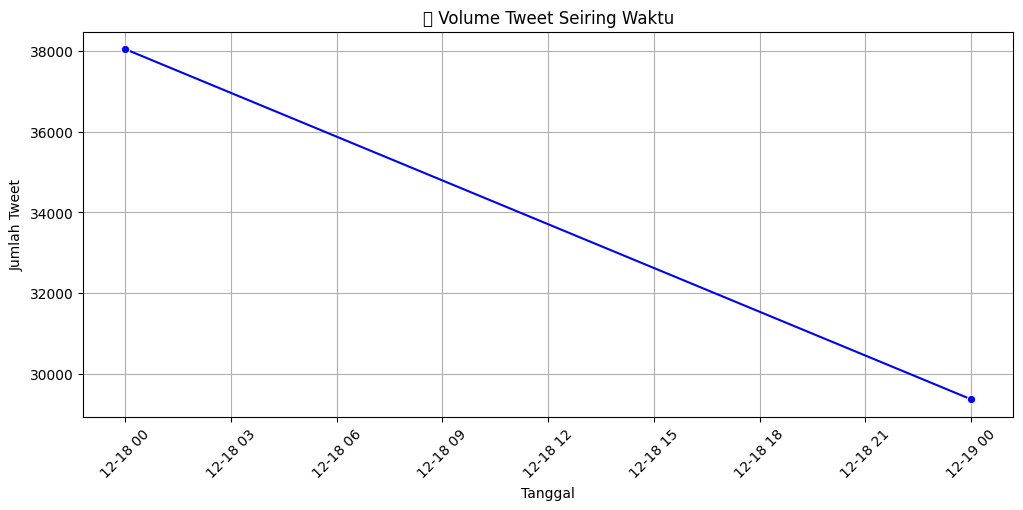

C:\Users\Fathu Rizka\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


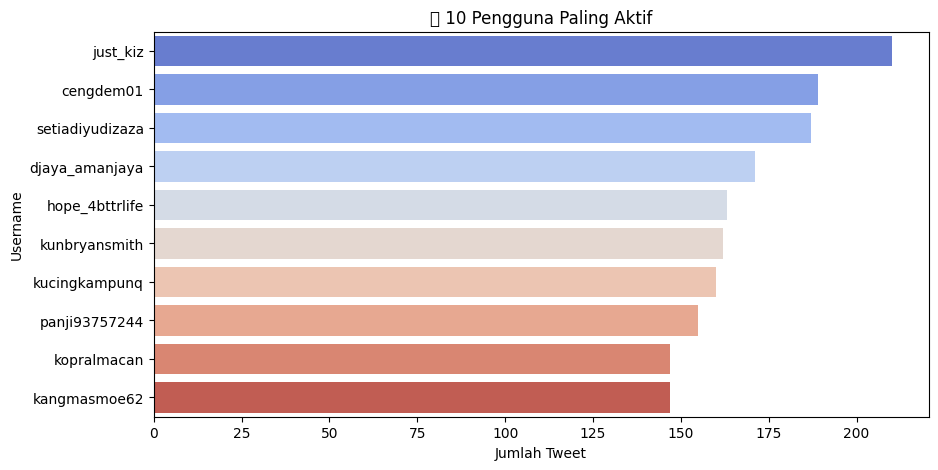

In [54]:
# 📌 Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📌 Lokasi Dataset
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\twitter_data_cleaned.csv"

# 📌 Cek apakah file ada
if not os.path.exists(file_path):
    print(f"❌ Error: File tidak ditemukan di lokasi {file_path}")
else:
    # ✅ Baca Dataset
    df = pd.read_csv(file_path)
    print("✅ Dataset berhasil dimuat!")
    
    # ✅ Cek Nama Kolom
    print("🔹 Kolom yang tersedia:", df.columns)

    # ✅ Pastikan Tidak Ada NaN di Kolom Tweet
    df = df.dropna(subset=["tweet"]) 

    # 📌 1️⃣ Summary Statistics
    print("\n📊 Summary Statistics:")
    print(df.describe())

    # 📌 2️⃣ Konversi Kolom Timestamp (Cek Nama Kolom yang Sesuai)
    timestamp_col = None
    for col in ["timestamp", "created_at", "date", "datetime"]:
        if col in df.columns:
            timestamp_col = col
            break

    if timestamp_col:
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])
        df["date"] = df[timestamp_col].dt.date
        print(f"✅ Menggunakan kolom waktu: {timestamp_col}")
    else:
        print("⚠️ Tidak ada kolom waktu yang valid ditemukan!")

    # 📌 3️⃣ Visualisasi Volume Tweet Seiring Waktu
    if timestamp_col:
        tweet_counts = df.groupby("date").size()

        plt.figure(figsize=(12, 5))
        sns.lineplot(x=tweet_counts.index, y=tweet_counts.values, marker="o", color="blue")
        plt.title("📈 Volume Tweet Seiring Waktu")
        plt.xlabel("Tanggal")
        plt.ylabel("Jumlah Tweet")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
    else:
        print("⚠️ Tidak bisa menampilkan volume tweet karena kolom waktu tidak ditemukan!")

    # 📌 4️⃣ Aktivitas Pengguna Paling Aktif
    user_col = None
    for col in ["user", "username", "author"]:
        if col in df.columns:
            user_col = col
            break

    if user_col:
        top_users = df[user_col].value_counts().nlargest(10)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_users.values, y=top_users.index, palette="coolwarm")
        plt.title("🏆 10 Pengguna Paling Aktif")
        plt.xlabel("Jumlah Tweet")
        plt.ylabel("Username")
        plt.show()
    else:
        print("⚠️ Tidak bisa menampilkan aktivitas pengguna karena kolom 'user' tidak ditemukan!")

    # 📌 5️⃣ Metrik Keterlibatan (Retweet & Like)
    engagement_cols = ["retweets", "likes", "favorites"]
    valid_engagement_cols = [col for col in engagement_cols if col in df.columns]

    if valid_engagement_cols:
        plt.figure(figsize=(12, 6))
        df[valid_engagement_cols].sum().plot(kind="bar", color=["orange", "blue", "green"])
        plt.title("📊 Total Keterlibatan (Retweet & Like)")
        plt.ylabel("Jumlah")


[nltk_data] Downloading package punkt to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package brown to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Fathu Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_e

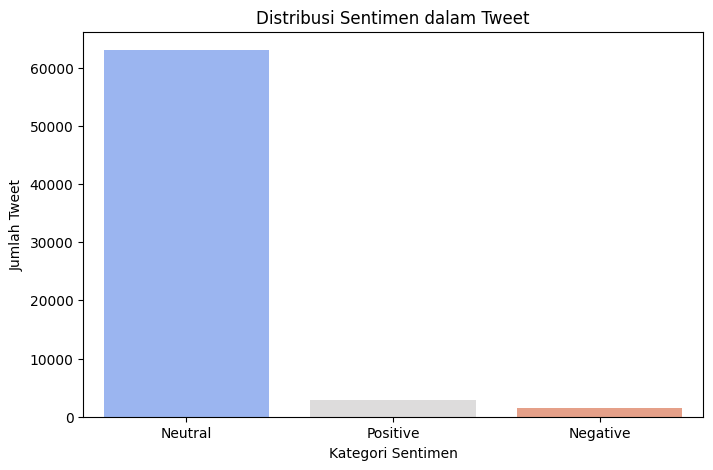

C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_18856\2881825083.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=emotion_counts.index.astype(str), x=emotion_counts.values, palette="viridis")


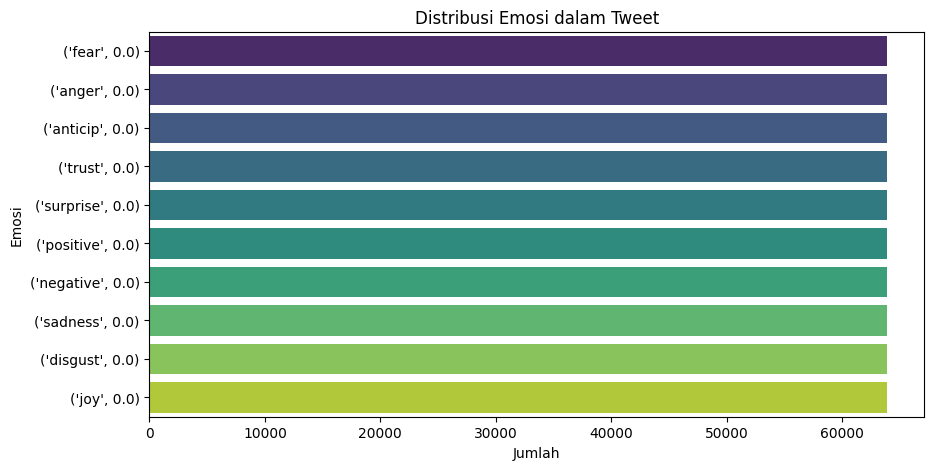

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')  # Jika menggunakan SentimentIntensityAnalyzer dari nltk


from textblob import TextBlob
from textblob.download_corpora import download_all

download_all()
from nltk.sentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex

# 📌 Load Dataset
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\twitter_data_cleaned.csv"
df = pd.read_csv(file_path)

# Pastikan kolom "tweet" ada dalam dataset
if "tweet" not in df.columns:
    raise KeyError("Kolom 'tweet' tidak ditemukan dalam dataset!")

# 📌 Download dan Setup Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# 📌 Analisis Sentimen
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["tweet"].astype(str).apply(get_sentiment)

# 📌 Analisis Emosi dengan NRCLex
def get_emotion(text):
    emotion = NRCLex(text)
    return emotion.top_emotions

df["Emotions"] = df["tweet"].astype(str).apply(get_emotion)

# 📌 Visualisasi Sentimen
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Distribusi Sentimen dalam Tweet")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()

# 📌 Visualisasi Emosi
# Pastikan tidak ada nilai NaN atau kosong sebelum explode()
df["Emotions"] = df["Emotions"].apply(lambda x: x if isinstance(x, list) else [])

# Hitung distribusi emosi
emotion_counts = df["Emotions"].explode().value_counts().head(10)  # Ambil 10 emosi teratas

# Pastikan tidak ada masalah dengan index sebelum plotting
if not emotion_counts.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(y=emotion_counts.index.astype(str), x=emotion_counts.values, palette="viridis")
    plt.title("Distribusi Emosi dalam Tweet")
    plt.xlabel("Jumlah")
    plt.ylabel("Emosi")
    plt.show()
else:
    print("⚠️ Tidak ada data emosi yang tersedia untuk divisualisasikan.")
    


In [19]:
from transformers import pipeline

# Load model NLP untuk analisis emosi
emotion_pipeline = pipeline("text-classification", model="joeddav/distilbert-base-uncased-go-emotions-student", top_k=1)

# Fungsi untuk mendapatkan label emosi dari model
def get_emotion(text):
    try:
        result = emotion_pipeline(text)  # Hasil berupa list of dict [{'label': 'joy', 'score': 0.98}]
        if result and isinstance(result, list) and isinstance(result[0], dict):
            return result[0].get("label", "neutral")
        return "neutral"
    except Exception as e:
        print(f"Error processing text: {text} -> {e}")
        return "neutral"

# Terapkan fungsi ke kolom tweet
df["Emotions"] = df["tweet"].apply(get_emotion)

# Cek hasil
print(df["Emotions"].value_counts().head(10))


Device set to use cpu


Emotions
neutral    67417
Name: count, dtype: int64


🔹 **Top 10 Influencers:**
RestyResseh: 0.1266
Raj4Purwa: 0.1022
KING__VADUKA: 0.0828
RadjaDjawa: 0.0623
PutraErlangga_: 0.0515
geloraco: 0.0476
Tjeloup: 0.0440
HukumDan: 0.0397
DZ03MIENT12: 0.0375
Namaku_Anisa: 0.0375


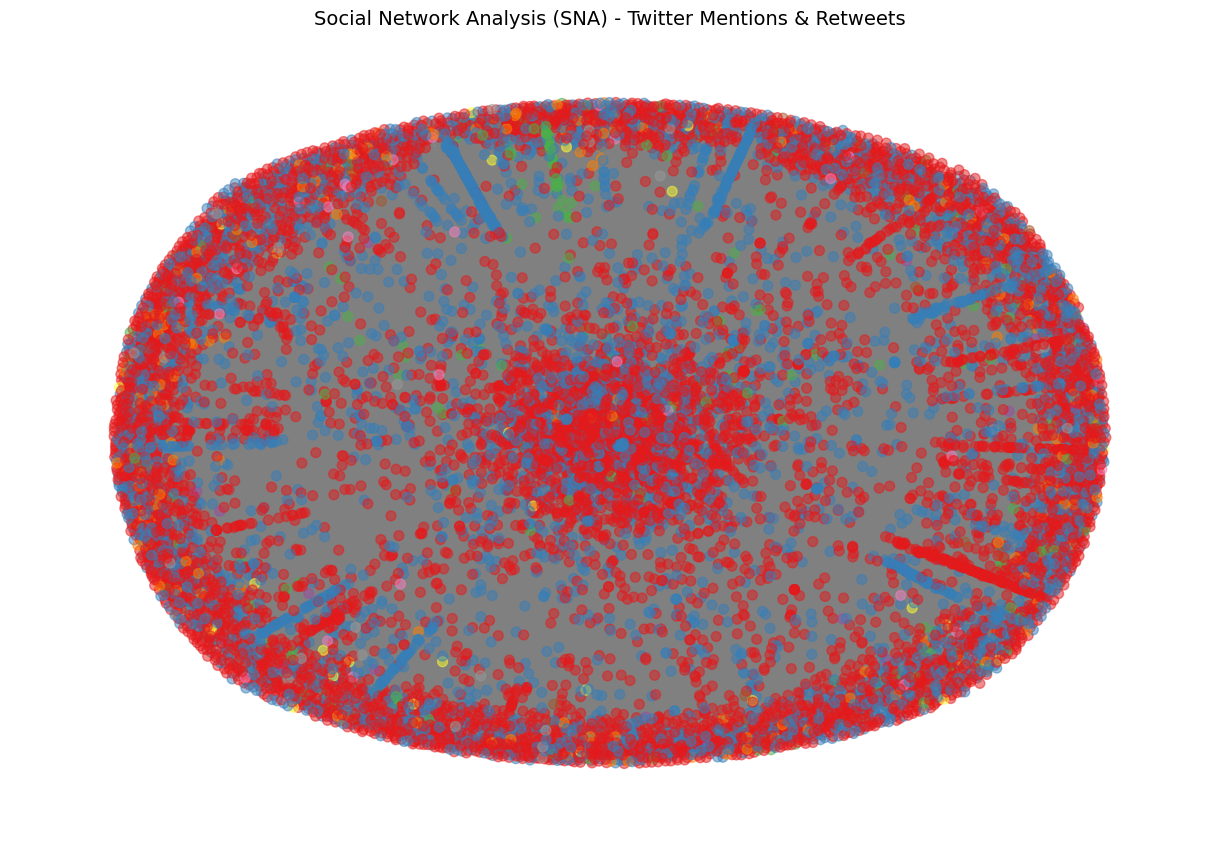

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import community.community_louvain as community_louvain
from collections import Counter

# Load dataset
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\twitter_data_cleaned.csv"
df = pd.read_csv(file_path)


# Pastikan dataset memiliki kolom 'tweet' dan 'username'
if "tweet" not in df.columns or "username" not in df.columns:
    raise ValueError("Dataset harus memiliki kolom 'tweet' dan 'username'.")

# Ekstrak mentions dan retweets
def extract_mentions(text):
    return re.findall(r"@(\w+)", text)

def extract_retweets(text):
    match = re.match(r"RT @(\w+)", text)
    return match.group(1) if match else None

df["mentions"] = df["tweet"].apply(extract_mentions)
df["retweets"] = df["tweet"].apply(extract_retweets)

# Bangun graf jaringan
G = nx.DiGraph()

# Tambahkan edges dari mention
for _, row in df.iterrows():
    user = row["username"]
    mentions = row["mentions"]
    for mentioned_user in mentions:
        G.add_edge(user, mentioned_user, type="mention")

# Tambahkan edges dari retweet
for _, row in df.iterrows():
    user = row["username"]
    retweeted_user = row["retweets"]
    if retweeted_user:
        G.add_edge(user, retweeted_user, type="retweet")

# Analisis Pengaruh (Influencer)
degree_centrality = nx.degree_centrality(G)
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("🔹 **Top 10 Influencers:**")
for user, score in top_influencers:
    print(f"{user}: {score:.4f}")

# Deteksi komunitas
partition = community_louvain.best_partition(G.to_undirected())

# Visualisasi Jaringan
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, node_size=50, node_color=colors, cmap=plt.cm.Set1, edge_color="gray", alpha=0.5, with_labels=False)
plt.title("Social Network Analysis (SNA) - Twitter Mentions & Retweets", fontsize=14)
plt.show()


In [28]:
import os

file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\twitter_data_cleaned.csv"

# Cek apakah file ada
if os.path.exists(file_path):
    print("✅ File ditemukan!")
else:
    print("❌ File tidak ditemukan! Periksa kembali lokasi dan nama file.")


✅ File ditemukan!
